<a href="https://colab.research.google.com/github/Florianschad/Personal/blob/main/A01762765_Final_presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analisis of world university ranking

In [92]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm

url = "https://raw.githubusercontent.com/Florianschad/Personal/main/world_university_rank.csv"

df = pd.read_csv(url)
df.head()

,Rank,University name,locationLocation,Number of Studnet,Number of student per staffs,International Student,Female : male ratio
0,1,University of Oxford,United Kingdom,20965.0,10.6,42%,48:52:00
1,2,Harvard University,United States,21887.0,9.6,25%,50:50:00
2,3,University of Cambridge,United Kingdom,20185.0,11.3,39%,47:53:00
3,3,Stanford University,United States,16164.0,7.1,24%,46:54:00
4,5,Massachusetts Institute of Technology,United States,11415.0,8.2,33%,40 : 60


## 1. Description of data set:

The data set gives information about the ranking of all Universities in the world and their distribution of students.

In [93]:
df.dtypes

Rank                             object
University name                  object
locationLocation                 object
Number of Studnet               float64
Number of student per staffs    float64
International Student            object
Female : male ratio              object
dtype: object

In [94]:
df.columns

Index(['Rank', 'University name', 'locationLocation', 'Number of Studnet',
       'Number of student per staffs', 'International Student',
       'Female : male ratio'],
      dtype='object')

## 2. Description of variables

* "Rank": discrete value, placement in comparison to other universities, categorical variable; Type: Discrete value
* "University name": Name of the University; Type: Categorical variable
* "locationlocation": Country in which the university is located. Whole country name is given; Type: Categorical variable
* "Number of Studnet": Amount of all students currently studying at the university2; Type: Continuous variable
* "Number of students per staff": Amount of students devided by the staff of the university; Type: Continuous variable
* "International students": Percentage of students that aren't native to he country in which the university is located; Type: Ratio variable (expressed as a percentage)
* "Female : male ratio": Ratio of Female to male in percent, given in the following format, (Female) XX : (Male) XX; Type: Ratio variable

In [95]:

df.isnull().any()


Rank                            False
University name                 False
locationLocation                 True
Number of Studnet               False
Number of student per staffs     True
International Student           False
Female : male ratio              True
dtype: bool

In [96]:
df.shape

(2345, 7)

## Q1: What is the amount of student distribution of the universities?

In [97]:
import  matplotlib as mpl
mpl.style.use('ggplot')
mpl.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Text(0.5, 1.0, 'Boxplot of Number of students')

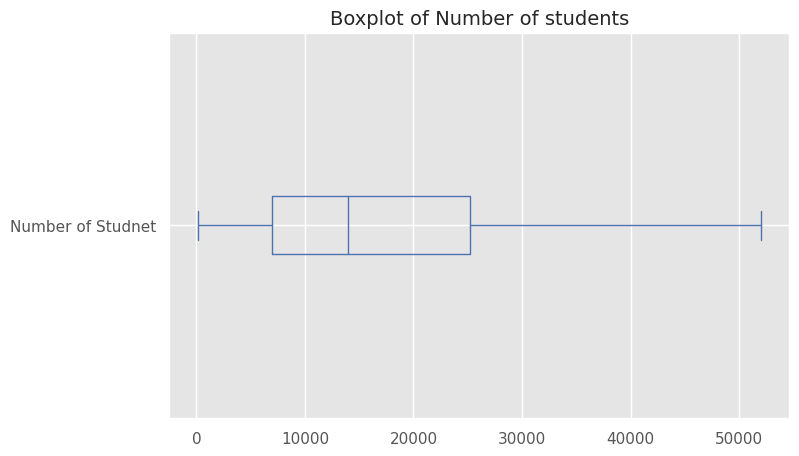

In [98]:
df ["Number of Studnet"].plot(kind ="box",
                showfliers = False ,
                figsize = (8, 5),
                vert = False,
                color = "b",
                )
plt.title("Boxplot of Number of students", fontsize = 14)

## Conclusion:
To enhance the information supplied by the graph, outliers were erased.

The median of the amount of students is round-a-bout 14000 students,

## Q2: How is Number of students to the amont of students per staff distributed?

Text(0.5, 1.0, 'Number of Studnet vs Number of student per staffs')

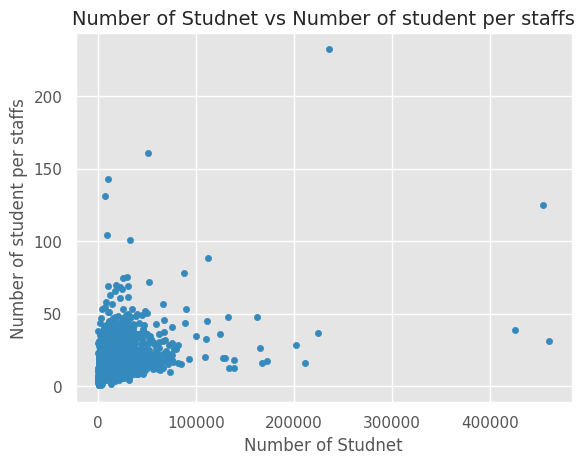

In [99]:
df.plot(kind = "scatter",
        x= "Number of Studnet",
        y= "Number of student per staffs",)
import matplotlib.pyplot as plt
plt.title("Number of Studnet vs Number of student per staffs", fontsize = 14)

## Conclusion:

Most of the universities have an amount of students per staff less than 50.



## Q3: How is the distribution of the amount of universities in the 20 countries with the most universities.

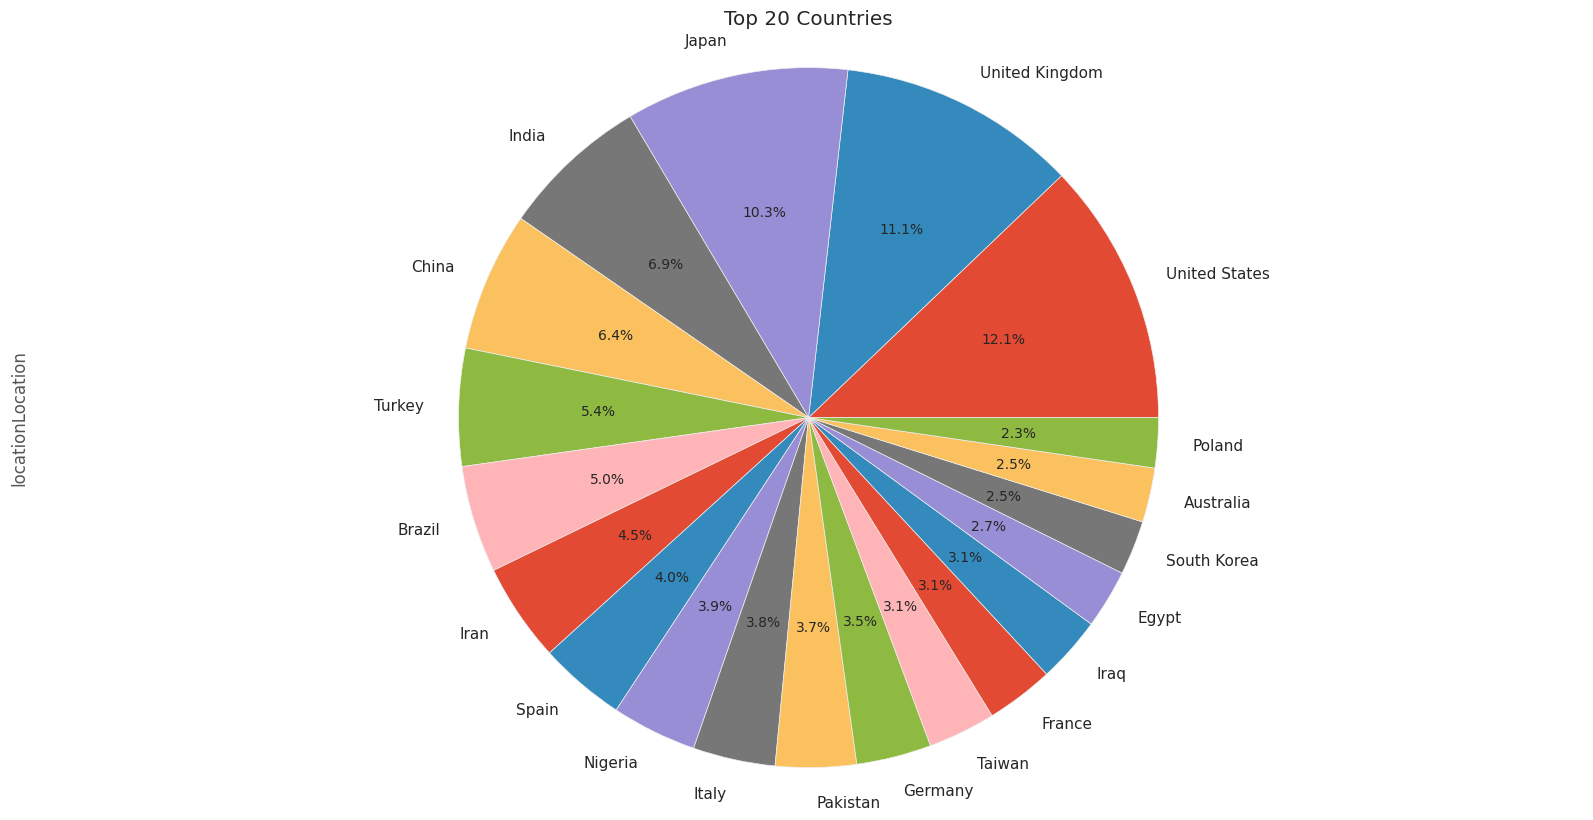

In [122]:
import matplotlib.pyplot as plt

country_counts = df['locationLocation'].value_counts()
top_countries = country_counts.head(20)

plt.figure(figsize=(20, 10))

top_countries.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Top 20 Countries')
plt.show()

## Conclusion:

Over 30% of all universities in the world are located in the US, UK or Japan. Besides these 3 countries, the number of countries decreases very evenly.

## Q4: How many students are studying on a university with 20 students per staff?


Number of students = b0 + b1 * students per staff


Number of students is the dependant variable,

Students per is the independant variable



In [101]:
df.columns

Index(['Rank', 'University name', 'locationLocation', 'Number of Studnet',
       'Number of student per staffs', 'International Student',
       'Female : male ratio'],
      dtype='object')

In [102]:

df = df.rename(columns={"Number of Studnet": "Student", "Number of student per staffs": "perstaff"})

ndf = df[["Student", "perstaff"]].dropna()

X = sm.add_constant(ndf["perstaff"])
y = ndf["Student"]
modelA = sm.OLS(y, X)


resultA = modelA.fit()
print(resultA.summary())


                            OLS Regression Results                            
Dep. Variable:                Student   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     266.4
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           8.45e-57
Time:                        15:37:15   Log-Likelihood:                -26896.
No. Observations:                2344   AIC:                         5.380e+04
Df Residuals:                    2342   BIC:                         5.381e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6892.0656    895.941      7.693      0.0

In [120]:
print( "In a university with 20 students per staff are so much students studying:", 6892.0656 + 20 * 658.8623)

In a university with 20 students per staff are so much students studying: 20069.3116


## Conclusion:
In a university with 20 students per staff 20069.3116 students are studying.

## Q5: How are students in the 20 countries with the most students distributed in students per staff groups?

In [105]:
def cust_cls(y):
  if 0 <= y <= 5:
    return '0-5'
  elif 5< y <= 10:
    return '5-10'
  elif 10 < y <= 30:
    return '10-30'
  return '>=31'

In [107]:
df['Student staff ratio GP'] = df.apply(lambda tbl: cust_cls(tbl['perstaff']),
                       axis = 1)


In [108]:
count = pd.pivot_table(index=['Student staff ratio GP', 'locationLocation'],
               data = df,
              values = 'Rank',
               aggfunc = 'count',

).reset_index()



In [109]:
t = count.iloc[:, 2].sum()
t

2234

In [110]:
count['percentage'] = (count.iloc[:, 2]/t)*100
count

,Student staff ratio GP,locationLocation,Rank,percentage
0,0-5,Austria,1,0.044763
1,0-5,Cambodia,1,0.044763
2,0-5,China,2,0.089526
3,0-5,Denmark,1,0.044763
4,0-5,Iran,1,0.044763
...,...,...,...,...
228,>=31,United Kingdom,2,0.089526
229,>=31,United States,2,0.089526
230,>=31,Uzbekistan,3,0.134288
231,>=31,Vietnam,1,0.044763


In [111]:
top_20_nations = count.sort_values(by='percentage', ascending=False).head(20)

fig = px.sunburst(top_20_nations,
                  path=['Student staff ratio GP', 'locationLocation'],
                  values='percentage')

fig.update_traces(textinfo='label+percent entry')

fig.update_layout(height=600, width=800)
fig.update_layout(title='Amount of Staff per Student in the Top 20 Nations')

fig.show()


## Conclusion:
As you can see, in the Top 20 nations there are no universities beneath 5 students per staff and no universities above 30 students per staff.

## Q6: What is the correlation between Number of Students and Number of students per staff

<ipython-input-112-515ea874c92a>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



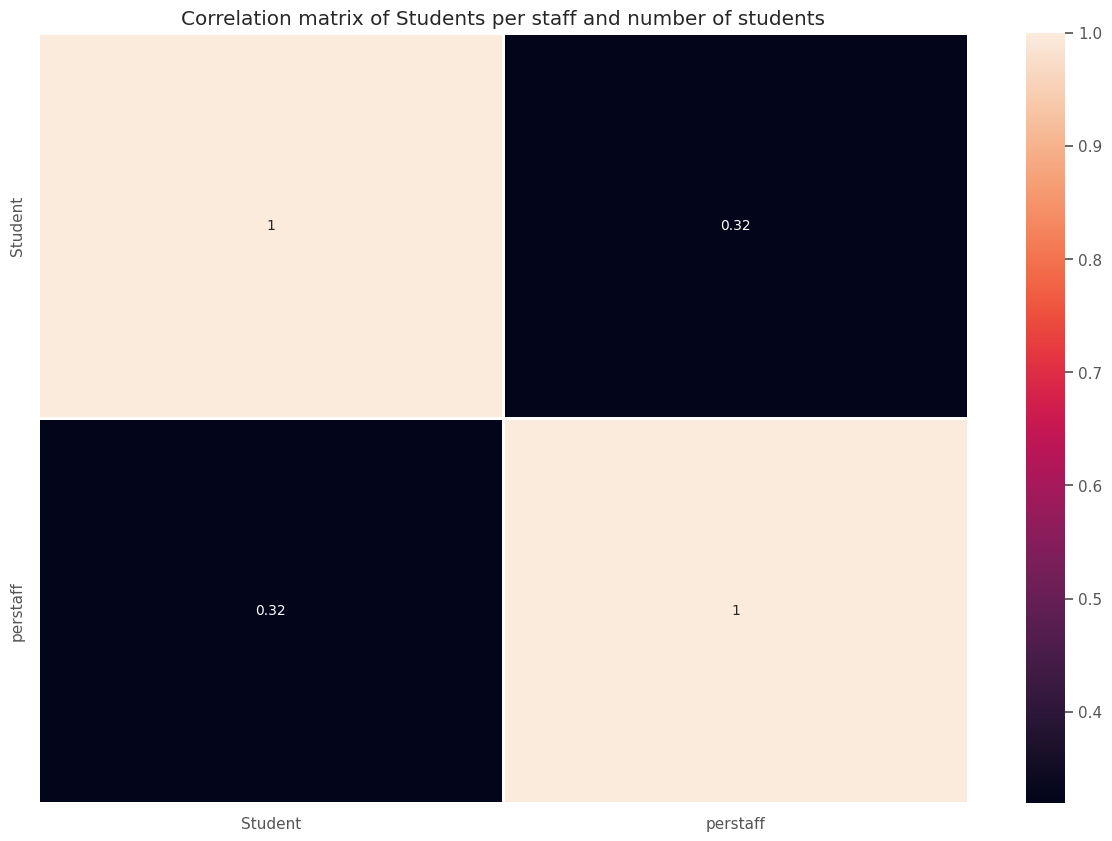

In [112]:
corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, linewidths=.8)
plt.title('Correlation matrix of Students per staff and number of students')
plt.show()

## Conclusion:
The correlation coeffizient between Number of students and Number of students per staff is 0.32

## Q7: Amount of students per Nations for the 20 natiosn with the most students.

In [117]:
nation_sum = df.groupby('locationLocation')['Student'].sum().reset_index()
sorted_df = nation_sum.sort_values(by='Student', ascending=False)


top_20_nations = sorted_df.head(20)

fig = px.bar(top_20_nations, x='locationLocation', y='Student',
             title='Top 20 Nations with the Most Students',
             labels={'locationLocation': 'Nation', 'Student': 'Sum of Students'},
             text='Student')

fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.update_layout(xaxis_title='Nation', yaxis_title='Sum of Students')

fig.show()


## Conclucion:
The United States has the most students with an amount of 4079886 students.

## Q8:  Histogramm of the number of students per staffs

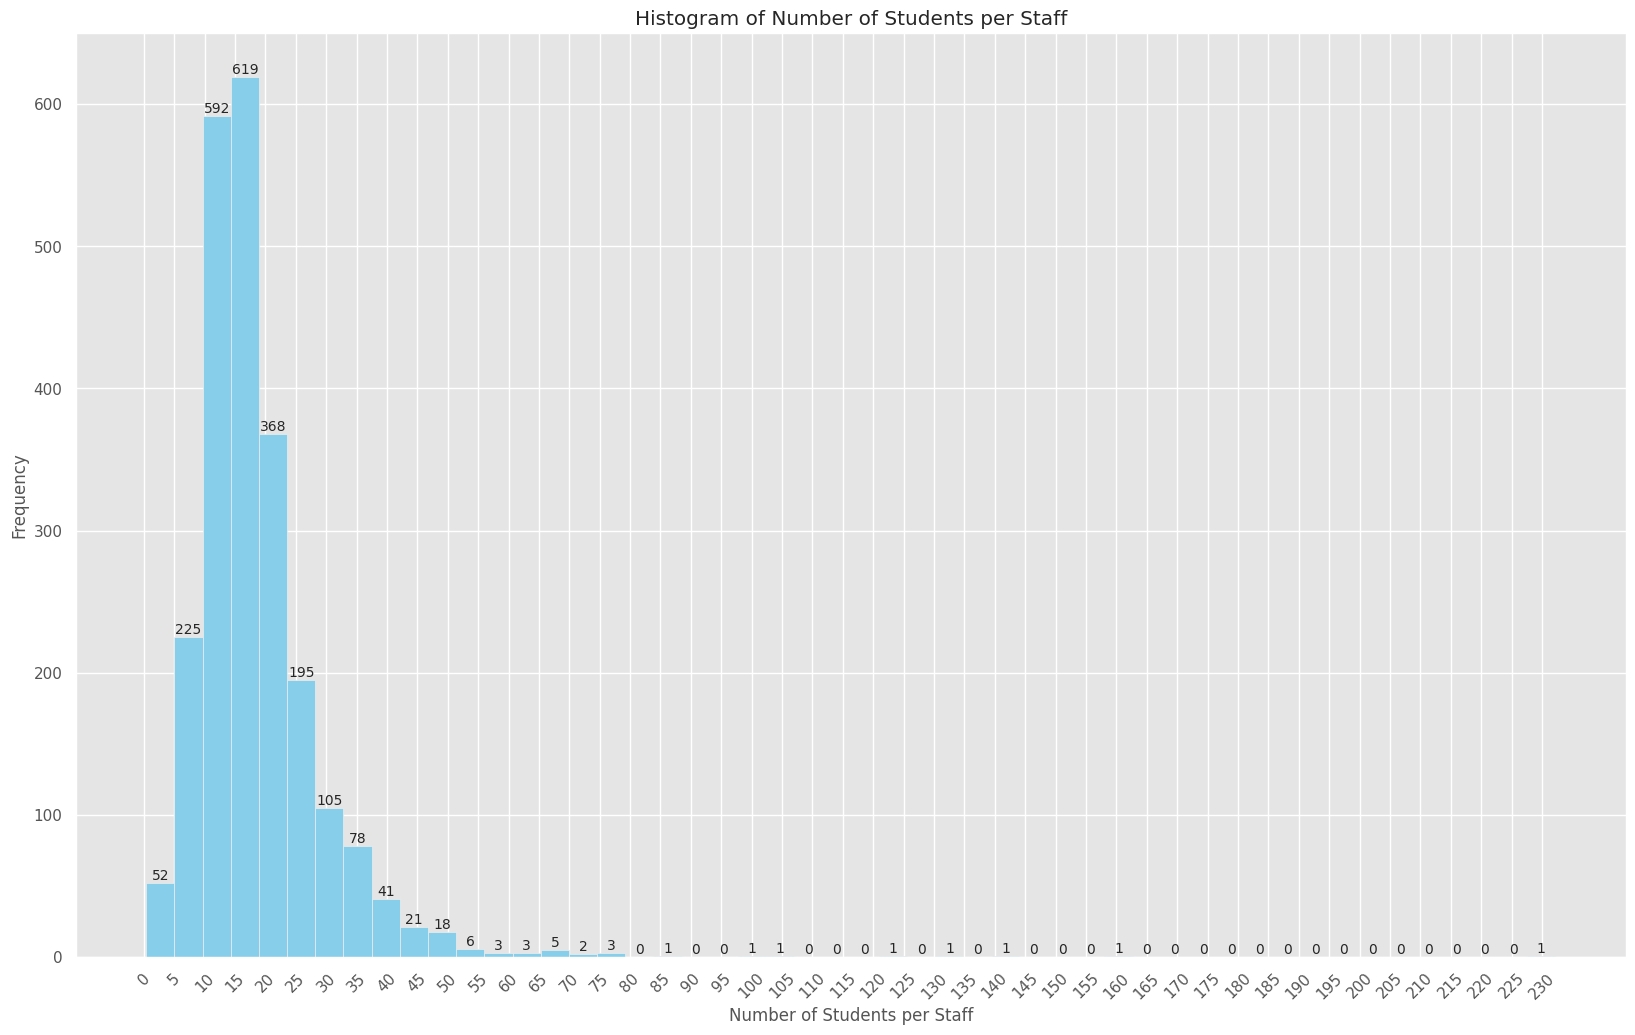

In [119]:
plt.figure(figsize=(20, 12))

hist, bins, _ = plt.hist(df['perstaff'], bins=50, color='skyblue')

plt.xlabel('Number of Students per Staff')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Students per Staff')

for i in range(len(bins) - 1):
    plt.text((bins[i] + bins[i + 1]) / 2, hist[i], str(int(hist[i])), ha='center', va='bottom')

custom_ticks = np.arange(0, max(df['perstaff']), step=5)
plt.xticks(custom_ticks, [str(int(tick)) for tick in custom_ticks], rotation=45)

plt.show()


## Conclusion:
The histogram underlines distribution of the Number of student per staffs as most of the universities have 15-25 students per staff.